In [1]:
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = tf.keras.datasets.mnist.load_data()

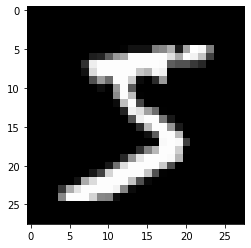

In [3]:
plt.imshow(X_TRAIN[0],cmap='gray')

In [4]:
# rescalling data

x_train = X_TRAIN/255.0
x_test = X_TEST/255.0

 

In [5]:
x_train_t = x_train
x_test_t = x_test

In [6]:
import random
def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

In [7]:
for i in range(len(x_train_t)):
    x_train_t[i] = add_noise(x_train_t[i],random_chance=30)

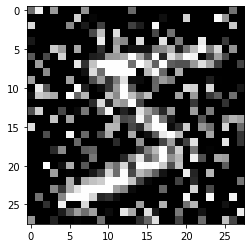

In [8]:
plt.imshow(x_train_t[0],cmap='gray')

In [9]:
x_train[0].shape

(28, 28)

In [10]:
encoder_inp = keras.Input(shape = (28,28,1))
flat = keras.layers.Flatten()(encoder_inp)

enc_hl1 = keras.layers.Dense(64,activation='relu')(flat)
#enc_hl2 = keras.layers.Dense(32,activation='relu')(enc_hl1)
encoder = keras.Model(encoder_inp,enc_hl1)

#dec_inp1 =  keras.layers.Dense(32,activation='relu')(enc_hl2)
dec_inp = keras.layers.Dense(784,activation='relu')(enc_hl1)
dec_out = keras.layers.Reshape((28,28,1))(dec_inp)

optim = keras.optimizers.Adam(lr=0.001)
autoencoder = keras.Model(encoder_inp,dec_out)

autoencoder.summary()




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [11]:
import time
import os
from keras.callbacks import TensorBoard

In [12]:

name = 'model_dlx1_{}'.format(int(time.time()))
name = os.path.join("logs",name)
tb= TensorBoard(log_dir=name)
autoencoder.compile(optim,loss='mse')
mod = autoencoder.fit(x_train_t,x_train,epochs=10,batch_size=32,validation_split=0.1,callbacks=[tb])

Epoch 1/10
1688/1688 [==============================] - 7s 3ms/step - loss: 0.0992 - val_loss: 0.0832
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0829 - val_loss: 0.0820
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0819 - val_loss: 0.0817
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0817 - val_loss: 0.0816
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0815 - val_loss: 0.0813
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0813 - val_loss: 0.0812
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0811 - val_loss: 0.0808
Epoch 8/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0808 - val_loss: 0.0808
Epoch 9/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0808 - val_loss: 0.0808
Epoch 10/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.080

# Compresion Using Auto Encoder

In [13]:
img1 = x_test[0]
auto_enco = autoencoder.predict(img1.reshape(-1,28,28,1))[0]

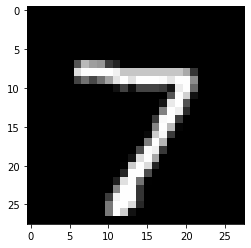

In [14]:
plt.imshow(x_test[0],cmap='gray')

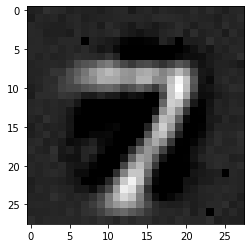

In [15]:
plt.imshow(auto_enco,cmap='gray')

# Removing Noice using Aencoder

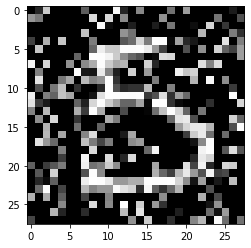

In [19]:
n_x = add_noise(x_test_t[15],random_chance=30)
plt.imshow(n_x,cmap='gray')

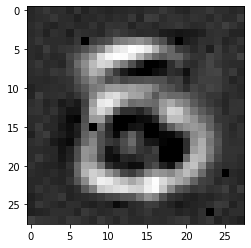

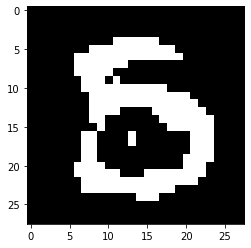

In [20]:
auto_enco = autoencoder.predict(n_x.reshape(-1,28,28,1))[0]
plt.imshow(auto_enco,cmap='gray')
plt.show()
auto_enco = auto_enco>0.3
plt.imshow(auto_enco,cmap='gray')

In [21]:
#autoencoder.save('noiceReduc_lev_50')